Laboratorio 8

Integrantes:
Bryann Alfaro 19372
Raul Jimenez 19017
Donaldo Garcia 19683

In [ ]:


! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from pandas_profiling import ProfileReport

In [24]:
confirmed = pd.read_csv("confirmed.csv")
deaths = pd.read_csv("deaths.csv")
recovered = pd.read_csv("recovered.csv")

Colocar formato standard a columnas

In [25]:
confirmed = confirmed.rename(columns={"Province/State":"provincia", "Country/Region":"pais", "Lat":"latitud", "Long":"longitud"})
deaths = deaths.rename(columns={"Province/State":"provincia", "Country/Region":"pais", "Lat":"latitud", "Long":"longitud"})
recovered = recovered.rename(columns={"Province/State":"provincia", "Country/Region":"pais", "Lat":"latitud", "Long":"longitud"})


Dando formato Tidy

In [26]:
confirmed = confirmed.melt(id_vars=["provincia","pais","latitud","longitud"], var_name="date_info", value_name="confirmed")
deaths = deaths.melt(id_vars=["provincia","pais","latitud","longitud"], var_name="date_info", value_name="deaths")
recovered = recovered.melt(id_vars=["provincia","pais","latitud","longitud"], var_name="date_info", value_name="recovered")


Colocar formato Datetime en fechas

In [27]:
confirmed = confirmed.assign(fecha = pd.to_datetime(confirmed["date_info"], format="%m/%d/%y"))
confirmed.drop(columns=["date_info"], inplace=True)

deaths = deaths.assign(fecha = pd.to_datetime(deaths["date_info"], format="%m/%d/%y"))
deaths.drop(columns=["date_info"], inplace=True)

recovered = recovered.assign(fecha = pd.to_datetime(recovered["date_info"], format="%m/%d/%y"))
recovered.drop(columns=["date_info"], inplace=True)



Reordenar los datos

In [28]:
confirmed = confirmed.filter(["pais", "fecha", "provincia", "latitud", "longitud","confirmed"]).sort_values(["pais", "fecha"]).reset_index(drop=True)
deaths = deaths.filter(["pais", "fecha", "provincia", "latitud", "longitud","deaths"]).sort_values(["pais", "fecha"]).reset_index(drop=True)
recovered = recovered.filter(["pais", "fecha", "provincia", "latitud", "longitud", "recovered"]).sort_values(["pais", "fecha"]).reset_index(drop=True)


Merge

In [29]:
#Eliminar columnas de latitud y longitud en deaths y recovered para que no esten duplicadas en el dataframe final
deaths.drop(columns=["latitud","longitud"], inplace=True)
recovered.drop(columns=["latitud","longitud"], inplace=True)


In [30]:
#Realizando el merge

df_covid = (confirmed.merge(deaths, on=["pais","fecha","provincia"], how="left").merge(recovered, on=["pais","fecha","provincia"], how="left"))


Analisis exploratorios

In [31]:
#Observar primeros datos y shape
print(df_covid.head())
print(df_covid.shape)


          pais      fecha provincia   latitud   longitud  confirmed  deaths  \
0  Afghanistan 2020-01-22       NaN  33.93911  67.709953          0       0   
1  Afghanistan 2020-01-23       NaN  33.93911  67.709953          0       0   
2  Afghanistan 2020-01-24       NaN  33.93911  67.709953          0       0   
3  Afghanistan 2020-01-25       NaN  33.93911  67.709953          0       0   
4  Afghanistan 2020-01-26       NaN  33.93911  67.709953          0       0   

   recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
(286688, 8)


In [32]:
df_covid.tail()

,pais,fecha,provincia,latitud,longitud,confirmed,deaths,recovered
286683,Zimbabwe,2022-10-05,NaN,-19.015438,29.154857,257568,5603,0.0
286684,Zimbabwe,2022-10-06,NaN,-19.015438,29.154857,257655,5604,0.0
286685,Zimbabwe,2022-10-07,NaN,-19.015438,29.154857,257655,5604,0.0
286686,Zimbabwe,2022-10-08,NaN,-19.015438,29.154857,257655,5604,0.0
286687,Zimbabwe,2022-10-09,NaN,-19.015438,29.154857,257655,5604,0.0


In [11]:
#Se realiza el profiler
profile = ProfileReport(df_covid)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286688 entries, 0 to 286687
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   pais       286688 non-null  object        
 1   fecha      286688 non-null  datetime64[ns]
 2   provincia  90272 non-null   object        
 3   latitud    284704 non-null  float64       
 4   longitud   284704 non-null  float64       
 5   confirmed  286688 non-null  int64         
 6   deaths     286688 non-null  int64         
 7   recovered  270816 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 19.7+ MB


In [34]:
#Se puede notar datos estadisticos y comprobar si los rangos parecen razonables
df_covid.describe()


,latitud,longitud,confirmed,deaths,recovered
count,284704.000000,284704.000000,2.866880e+05,2.866880e+05,2.708160e+05
mean,19.718719,22.182084,7.609384e+05,1.188106e+04,8.576749e+04
std,25.911394,77.735286,4.091067e+06,5.837816e+04,7.557676e+05
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,-1.000000e+00
25%,3.933900,-42.604300,4.090000e+02,2.000000e+00,0.000000e+00
50%,21.512583,20.939400,9.957500e+03,1.130000e+02,0.000000e+00
75%,40.463667,90.356300,1.692530e+05,2.447250e+03,1.719000e+03
max,71.706900,178.065000,9.669924e+07,1.062564e+06,3.097475e+07


In [35]:
#Se notan datos negativos en los recuperados, por lo que se deben eliminar para que no afecte
print(len(df_covid)) #datos antes
df_covid = df_covid.query("not(recovered<0)")
print(len(df_covid)) #datos despues

286688
286680


In [36]:
df_covid.isnull().sum()

pais              0
fecha             0
provincia    196416
latitud        1984
longitud       1984
confirmed         0
deaths            0
recovered     15872
dtype: int64

In [37]:
import numpy as np
#Se nota que los datos principales estan completos, en el caso de recuperados puede que al inicio este dato no se reportara , por lo que es aceptable.
vals ={"provincia":"", "latitud":np.NaN, "longitud":np.NaN, "recovered":0}
df_covid.fillna(value=vals)

,pais,fecha,provincia,latitud,longitud,confirmed,deaths,recovered
0,Afghanistan,2020-01-22,,33.939110,67.709953,0,0,0.0
1,Afghanistan,2020-01-23,,33.939110,67.709953,0,0,0.0
2,Afghanistan,2020-01-24,,33.939110,67.709953,0,0,0.0
3,Afghanistan,2020-01-25,,33.939110,67.709953,0,0,0.0
4,Afghanistan,2020-01-26,,33.939110,67.709953,0,0,0.0
...,...,...,...,...,...,...,...,...
286683,Zimbabwe,2022-10-05,,-19.015438,29.154857,257568,5603,0.0
286684,Zimbabwe,2022-10-06,,-19.015438,29.154857,257655,5604,0.0
286685,Zimbabwe,2022-10-07,,-19.015438,29.154857,257655,5604,0.0
286686,Zimbabwe,2022-10-08,,-19.015438,29.154857,257655,5604,0.0


In [ ]:


!pip install quickda



In [40]:
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *

In [41]:
#Se estandarizan los nombres de variables
df_covid = clean(df_covid, method="standardize")

Outlier Analysis - Boxplot


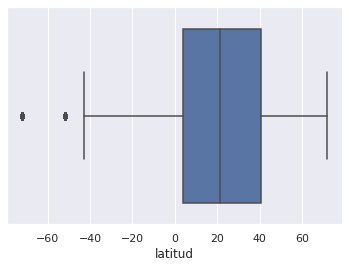

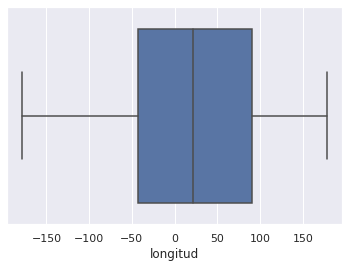

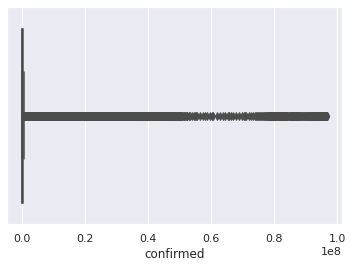

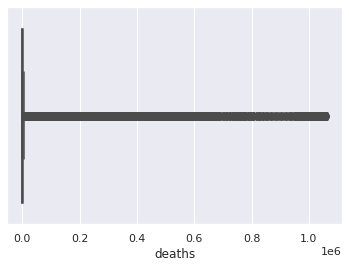

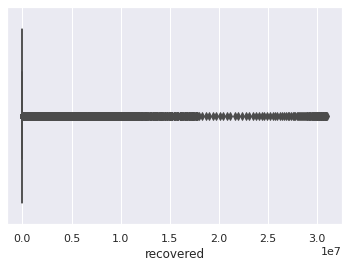

Distribution Analysis - Histogram


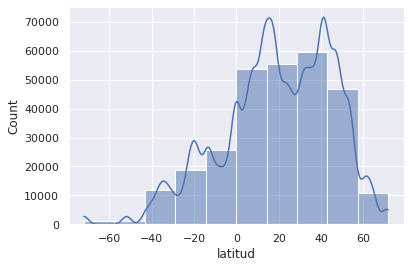

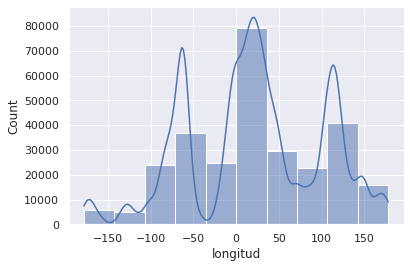

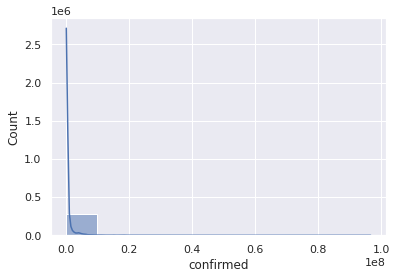

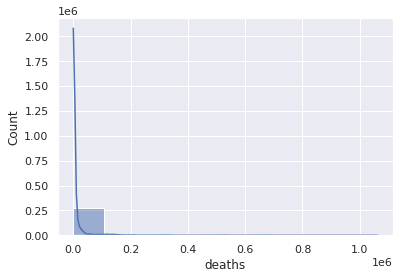

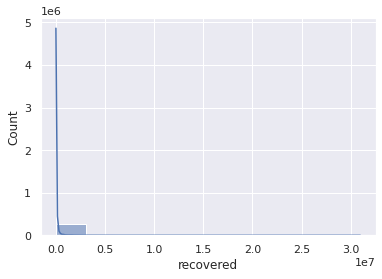

In [42]:
#Se hace boxplot de las numericas
eda_num(df_covid)